In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import pandas_datareader as pdr
import datetime as dt

In [3]:
start = dt.datetime(2000,1,1)
end = dt.datetime.now()

coin = ["BTC-USD" , "ETH-USD"]

df = pd.DataFrame()

for i in coin:
    data = pdr.DataReader(i , "yahoo" , start , end)
    df = pd.concat([df , data['Close']] , axis = 1)

In [5]:
df = pd.DataFrame(data = df.values , index = df.index , columns = coin)
df

,BTC-USD,ETH-USD
2014-09-17,457.334015,NaN
2014-09-18,424.440002,NaN
2014-09-19,394.795990,NaN
2014-09-20,408.903992,NaN
2014-09-21,398.821014,NaN
...,...,...
2022-05-25,29562.361328,1944.827881
2022-05-26,29267.224609,1803.913330
2022-05-27,28627.574219,1724.922852
2022-05-28,28814.900391,1757.941772


In [6]:
def cumulative_return(price_serie):
    na_len = price_serie.isna().sum()
    na_array = np.array([np.nan for i in range(na_len)])
    price_serie = price_serie.dropna(axis = 0)
    returnn = price_serie.pct_change()
    returnn_1 = returnn.values + 1
    returnn_1 = returnn_1[1:]
    cumulative_return = [1]
    for i in range(len(returnn_1)):
        cumulative_return.append(cumulative_return[i] * returnn_1[i])
    cumulative_return = np.array(cumulative_return)
    cumulative_return = np.concatenate([na_array , cumulative_return])
    return(cumulative_return)

In [7]:
for i in coin:
    df[i + " CR"] = cumulative_return(df[i])
    print(i)

BTC-USD
ETH-USD


In [8]:
df_return = df.drop(coin , axis = 1)

In [9]:
df_return

,BTC-USD CR,ETH-USD CR
2014-09-17,1.000000,NaN
2014-09-18,0.928074,NaN
2014-09-19,0.863255,NaN
2014-09-20,0.894104,NaN
2014-09-21,0.872056,NaN
...,...,...
2022-05-25,64.640635,6.060844
2022-05-26,63.995294,5.621699
2022-05-27,62.596643,5.375534
2022-05-28,63.006248,5.478434


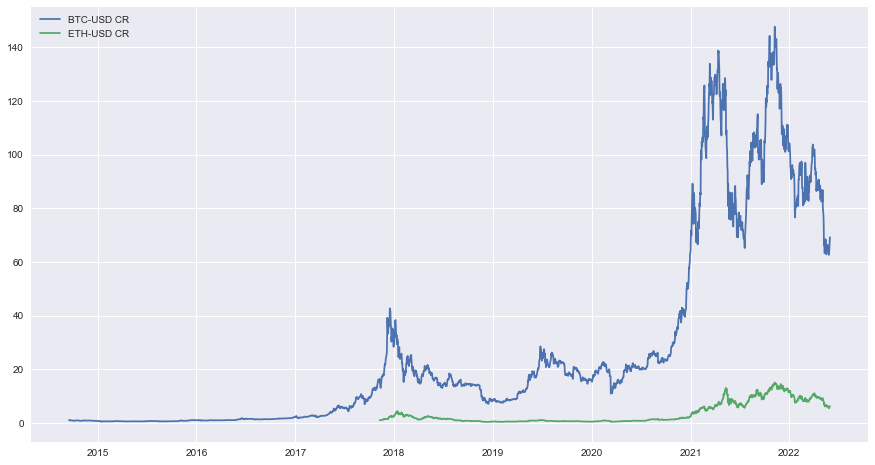

In [11]:
from matplotlib import style
style.use('seaborn')

plt.figure(figsize = [15 , 8])

for i in df_return.columns:
    plt.plot(df[i] , label = i)
plt.legend()